<a href="https://colab.research.google.com/github/asheta66/CNN/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [487]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("data.csv")

In [488]:
df.shape

(536, 8)

In [489]:
df.head()

,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM,ISE
0,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524,0.038376
1,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773,0.031813
2,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015,-0.026353
3,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424,-0.084716
4,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802,0.009658


In [490]:
df.sample(n = 10)

,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM,ISE
452,0.010469,0.005203,0.004373,-0.016686,0.007714,0.004382,0.000442,-0.011327
65,-0.008367,-0.008055,-0.009024,0.012278,-0.005059,-0.006639,0.004192,0.018613
192,0.002708,-0.002990,-0.005680,0.011061,-0.000527,-0.004043,0.004296,-0.009687
468,-0.001218,0.008216,0.004046,0.010505,-0.010486,0.006972,-0.001439,0.006379
497,-0.001509,-0.011687,-0.004245,-0.011240,0.005106,-0.009191,0.003314,0.008438
4,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802,0.009658
370,-0.002990,-0.010345,-0.013141,-0.018885,0.005370,-0.013176,-0.002068,-0.022131
333,-0.016788,-0.001500,-0.011548,0.000000,-0.006612,-0.006069,0.004165,0.008757
414,-0.014619,-0.012635,-0.015168,-0.013422,-0.012598,-0.015370,-0.009731,-0.013976
279,-0.002748,-0.000643,-0.003688,0.000000,-0.004152,-0.003473,-0.002354,-0.009244


**Remove outliers**

Z-score method: This method is based on the standard deviation of the data. Any data point that is outside a certain number of standard deviations from the mean is considered an outlier. You can use the scipy.stats.zscore function to calculate the z-scores of the data and remove any row with a z-score above a certain threshold.

In [491]:
# from scipy.stats import zscore

# # Calculate z-scores of the dataframe
# z_scores = zscore(df)

# # Identify rows with z-scores above a certain threshold (e.g. 3)
# threshold = 3
# outliers = (abs(z_scores) > threshold).any(axis=1)

# # Remove outliers from the dataframe
# df = df[~outliers]

Interquartile range (IQR) method: This method is based on the distribution of the data. The IQR is the difference between the third quartile and the first quartile of the data. Any data point that is outside a certain range (e.g. 1.5 times the IQR) from the median is considered an outlier. You can use the numpy.percentile function to calculate the quartiles of the data and remove any row with a value outside the IQR range.

In [492]:
# import numpy as np

# # Calculate quartiles of the dataframe
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# # Identify rows with values outside the IQR range
# threshold = 1.5
# outliers = ((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)

# # Remove outliers from the dataframe
# df = df[~outliers]

In [493]:
column_names = df.columns
print(column_names)

Index(['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM', 'ISE'], dtype='object')


In [494]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # create subplots
# fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

# # iterate over column names
# for i, col in enumerate(df.columns):
#     # select column using [] operator
#     col_data = df[col]
    
#     # plot column data on subplot
#     axs[i//4, i%4].plot(col_data)
#     axs[i//4, i%4].set_title(col)
#     axs[i//4, i%4].set_xlabel('Time')
#     axs[i//4, i%4].set_ylabel('Amplitude')
#     axs[i//4, i%4].grid(True)

# # adjust subplot spacing
# plt.tight_layout()

# # display plot
# plt.show()

# # save the input and output data
# plt.savefig('In_Out_Data.png')


**Drawing the heatmap**

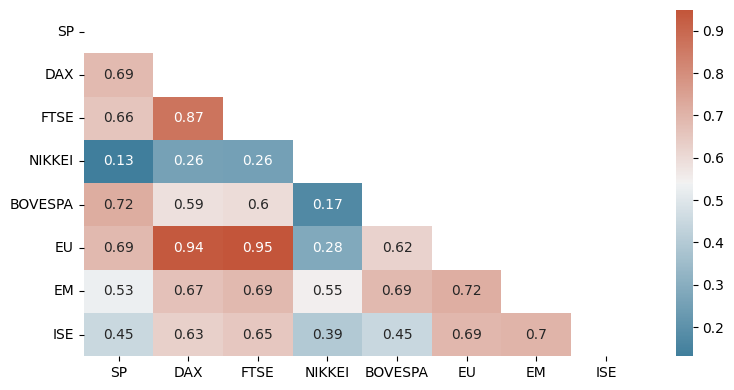

In [495]:
import seaborn as sns

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(8, 4))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.tight_layout()
plt.savefig('Heatmap.png')

**Correlation between different variables**

In [496]:
# Correlation heatmap with mask for upper traingle
# Correlation between different variables
corr = df.corr()

# get absolute correlation coefficients and sort in descending order
abs_corr = corr.abs().sort_values(by='ISE', ascending=False)

# display the rank of features based on correlation coefficients
rank = abs_corr['ISE'].rank(ascending=False).astype(int)
print('Rank of features based on correlation coefficients:\n', rank)

Rank of features based on correlation coefficients:
 ISE        1
EM         2
EU         3
FTSE       4
DAX        5
SP         6
BOVESPA    7
NIKKEI     8
Name: ISE, dtype: int64


**Data spliting**

In [497]:
# Split data into training and testing sets
X = df.drop('ISE', axis=1).values
y = df['ISE'].values
X_Train, X_Test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

**Select best features**

In [498]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif

#======================================
# Apply feature selection using SelectKBest and F-test
# We apply feature selection using SelectKBest and F-test, which selects the top 5 features based on their importance. 
selector  = SelectKBest(f_classif, k=5)
#======================================

X_train    = selector.fit_transform(X_Train, y_train)
X_test     = selector.transform(X_Test)

y_train = y_train
y_test  = y_test

/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


In [499]:
import matplotlib.pyplot as plt

def plot_actual_vs_estimated_responses_side_by_side(y_train, y_train_pred, y_test, y_test_pred, filename):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    # subplot 1: actual and estimated responses for training cases
    axs[0].plot(y_train, label='Actual')
    axs[0].plot(y_train_pred, label='Predicted')
    axs[0].set_title('Training Case')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Amplitude')
    axs[0].legend()
    axs[0].grid()

    # subplot 2: actual and estimated responses for testing cases
    axs[1].plot(y_test, label='Actual y_test')
    axs[1].plot(y_test_pred, label='Estimated y_test_pred')
    axs[1].set_title('Testing Case')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Amplitude')
    axs[1].legend()
    axs[1].grid()

    # adjust subplot spacing
    plt.tight_layout()

    # Save the figure
    fig.savefig(filename)

    # display plot
    plt.show()

In [500]:
import matplotlib.pyplot as plt
import numpy as np

def plot_two_responses(y_train, y_train_pred, filename, label):
    
    # Assuming y_train and y_train_pred are numpy arrays
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

    # Plot actual vs predicted response
    ax1.plot(y_train)
    ax1.plot(y_train_pred)
    # ax1.set_xlabel('Training Examples')
    ax1.set_ylabel('Response')
    ax1.set_title(label)
    ax1.legend()
    ax1.grid()

    # Plot error over time
    errors = y_train - y_train_pred.flatten()
    ax2.plot(errors, label='Error')
    # ax2.set_xlabel('Training Examples')
    ax2.set_ylabel('Error')
    # ax2.set_title('Error vs. Training Examples (Training Set)')
    ax2.legend()
    ax2.grid()

    # adjust subplot spacing
    plt.tight_layout()

    plt.show()
    # Save the figure
    fig.savefig(filename)


In [501]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

def plot_actual_vs_predicted(name, y_train, y_train_pred, y_test, y_test_pred):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4))

    ax1.scatter(y_train, y_train_pred, label='Training')
    ax1.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=3)
    ax1.set_xlabel('Actual')
    ax1.set_ylabel('Predicted')
    ax1.set_title(f'Training Set (R-Square: {round(r2_score(y_train, y_train_pred), 3)})')
    ax1.grid(True)

    ax2.scatter(y_test, y_test_pred, label='Testing')
    ax2.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3)
    ax2.set_xlabel('Actual')
    ax2.set_ylabel('Predicted')
    ax2.set_title(f'Testing Set (R-Square: {round(r2_score(y_test, y_test_pred), 3)})')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    # Save the figure with the specified filename
    fig.savefig(f'{name}.png')

In [502]:
import numpy as np
import pandas as pd
from math import sqrt

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def evaluate_model(model, X_train, y_train, X_test, y_test):

    # Calculate predictions for both training and testing datasets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the MSE, R-squared, MAE, VAF, and RMSE for both training and testing datasets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae  = mean_absolute_error(y_test, y_test_pred)

    train_rmse = sqrt(train_mse)
    test_rmse = sqrt(test_mse)

    # Create a table to display the results
    results = pd.DataFrame({
        'Metric': ['MSE', 'MAE', 'RMSE'],
        'Training Set': [train_mse, train_mae, train_rmse],
        'Testing Set': [test_mse, test_mae, test_rmse]
    })
    print(results)
    
    return results

In [503]:
X_train.shape

(214, 5)

**Linear Regression**

In [504]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
LinearR = LinearRegression()
LinearR.fit(X_train, y_train)

# Evaluate the model on the testing set
score = LinearR.score(X_test, y_test)
print('R-squared score:', score)

# Predict output for training and testing sets
y_train_pred = LinearR.predict(X_train)
y_test_pred = LinearR.predict(X_test)


R-squared score: 0.5571106480444716


In [505]:
evaluate_model(LinearR, X_train, y_train, X_test, y_test)

  Metric  Training Set  Testing Set
0    MSE      0.000157     0.000216
1    MAE      0.009975     0.011017
2   RMSE      0.012541     0.014698


,Metric,Training Set,Testing Set
0,MSE,0.000157,0.000216
1,MAE,0.009975,0.011017
2,RMSE,0.012541,0.014698


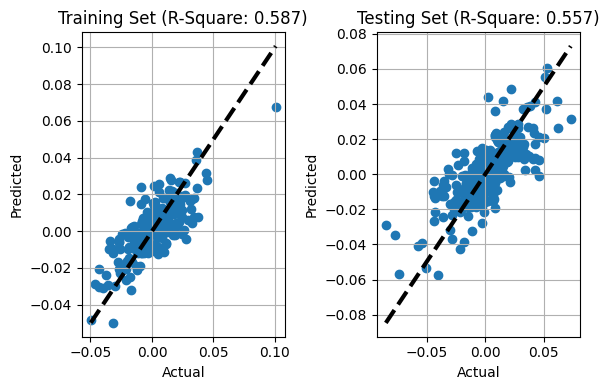

In [506]:
plot_actual_vs_predicted('Correlation_LR', y_train, y_train_pred, y_test, y_test_pred)

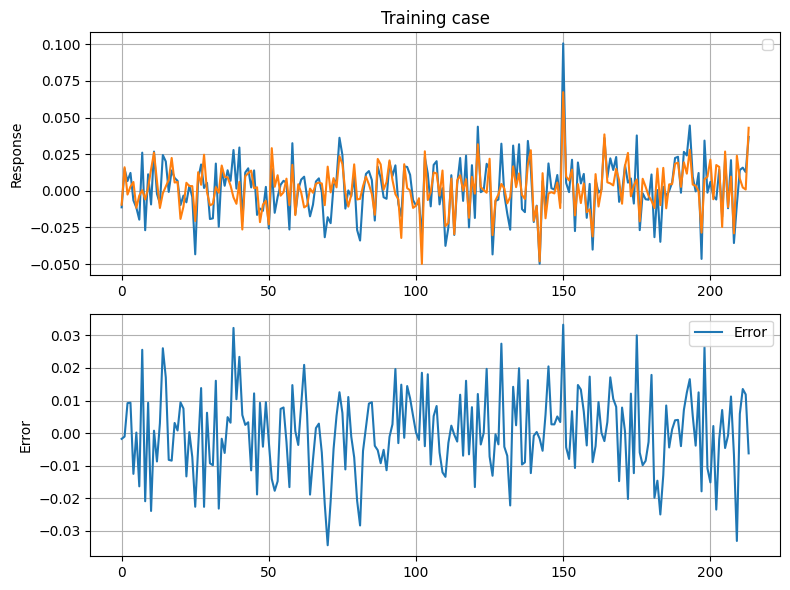

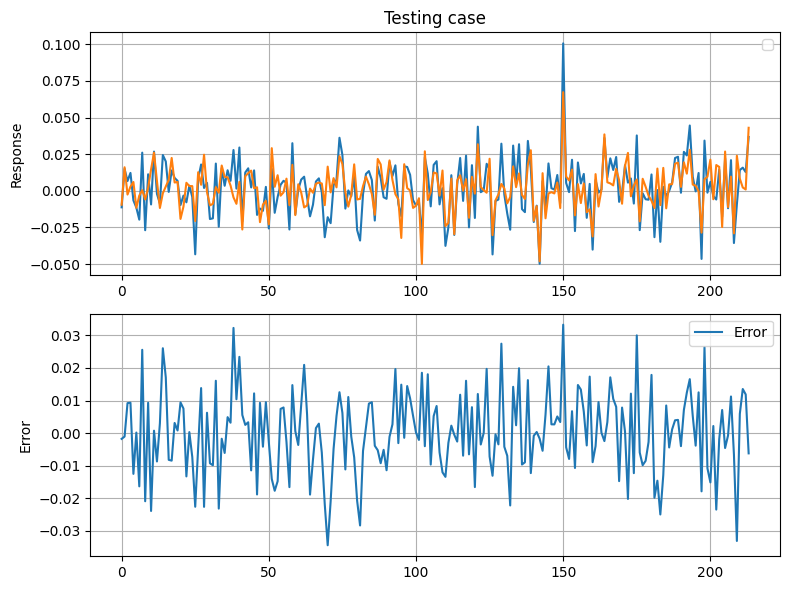

In [507]:
plot_two_responses(y_train, y_train_pred, 'LR_training', 'Training case')
plot_two_responses(y_train, y_train_pred, 'LR_testing', 'Testing case')

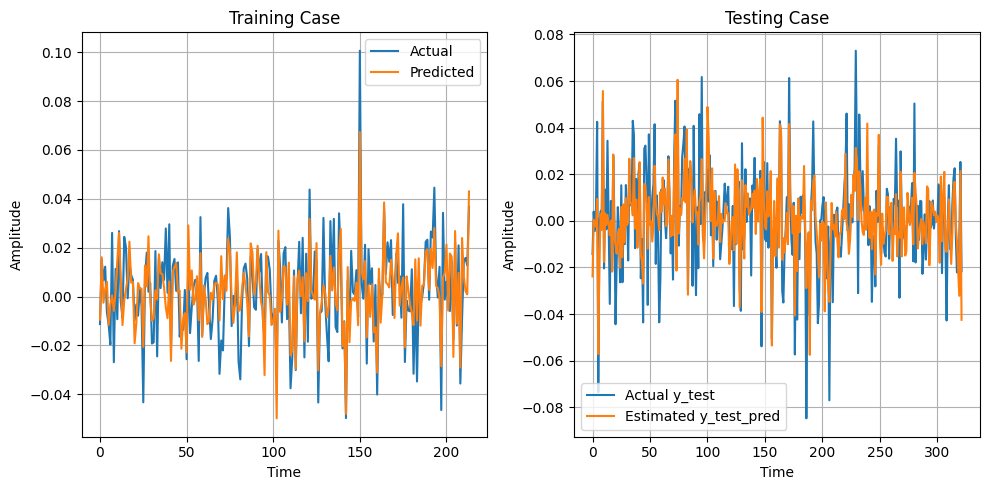

In [508]:
plot_actual_vs_estimated_responses_side_by_side(y_train, y_train_pred, y_test, y_test_pred, 'Actual_Estimated_SS_LR.png')

**Deep Learning**

In [509]:
from keras import regularizers

HL1 = 7
HL2 = 15

# Define the model architecture
# model = Sequential()
# model.add(Dense(HL1, activation='relu', input_dim=X_train.shape[1]))
# model.add(Dropout(0.5))
# model.add(Dense(HL2, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='linear'))

# Define the model architecture with L2 regularization
DL_model = Sequential()
DL_model.add(Dense(HL1, input_dim=X_train.shape[1], activation='relu'))
DL_model.add(Dense(HL2, activation='relu'))
DL_model.add(Dense(1, activation='linear'))

# Compile the model
DL_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the model with validation data
history = DL_model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/300
7/7 [==============================] - 1s 36ms/step - loss: 4.2050e-04 - accuracy: 0.0000e+00 - val_loss: 4.1568e-04 - val_accuracy: 0.0000e+00
Epoch 2/300
7/7 [==============================] - 0s 10ms/step - loss: 3.4344e-04 - accuracy: 0.0000e+00 - val_loss: 3.7932e-04 - val_accuracy: 0.0000e+00
Epoch 3/300
7/7 [==============================] - 0s 9ms/step - loss: 2.9432e-04 - accuracy: 0.0000e+00 - val_loss: 3.6117e-04 - val_accuracy: 0.0000e+00
Epoch 4/300
7/7 [==============================] - 0s 11ms/step - loss: 2.8191e-04 - accuracy: 0.0000e+00 - val_loss: 3.2950e-04 - val_accuracy: 0.0000e+00
Epoch 5/300
7/7 [==============================] - 0s 10ms/step - loss: 2.6425e-04 - accuracy: 0.0000e+00 - val_loss: 3.1226e-04 - val_accuracy: 0.0000e+00
Epoch 6/300
7/7 [==============================] - 0s 13ms/step - loss: 2.4025e-04 - accuracy: 0.0000e+00 - val_loss: 2.9787e-04 - val_accuracy: 0.0000e+00
Epoch 7/300
7/7 [==============================] - 0s 10ms/step -

In [510]:
# Predict at training and testing cases
y_train_pred2 = DL_model.predict(X_train)
y_test_pred2 = DL_model.predict(X_test)

11/11 [==============================] - 0s 4ms/step


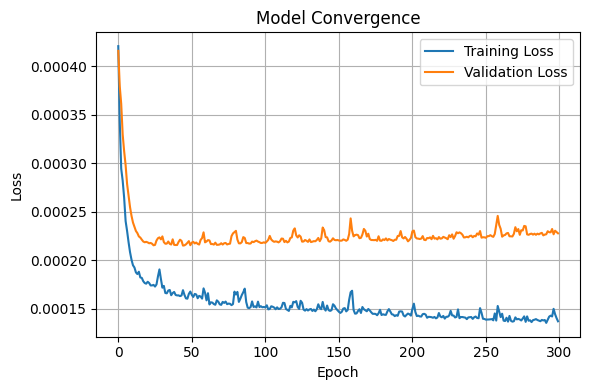

In [511]:
# Plot the convergence curve for training and validation
fig = plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Convergence')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.tight_layout()
plt.grid(True) 
plt.legend()
plt.show()
fig.savefig('CNN_convergence.png')

In [512]:
evaluate_model(DL_model, X_train, y_train, X_test, y_test)

11/11 [==============================] - 0s 2ms/step
  Metric  Training Set  Testing Set
0    MSE      0.000134     0.000228
1    MAE      0.009194     0.011412
2   RMSE      0.011571     0.015090


,Metric,Training Set,Testing Set
0,MSE,0.000134,0.000228
1,MAE,0.009194,0.011412
2,RMSE,0.011571,0.015090


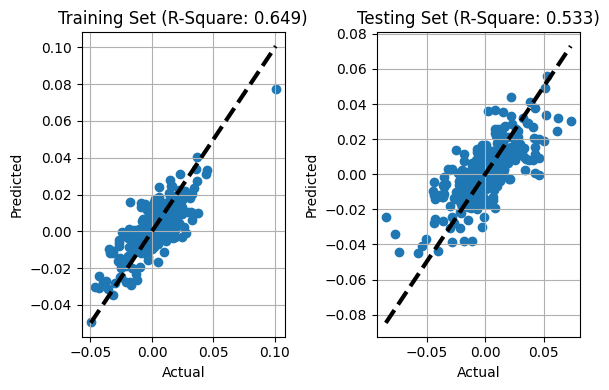

In [513]:
plot_actual_vs_predicted('Correlation_DL', y_train, y_train_pred2, y_test, y_test_pred2)

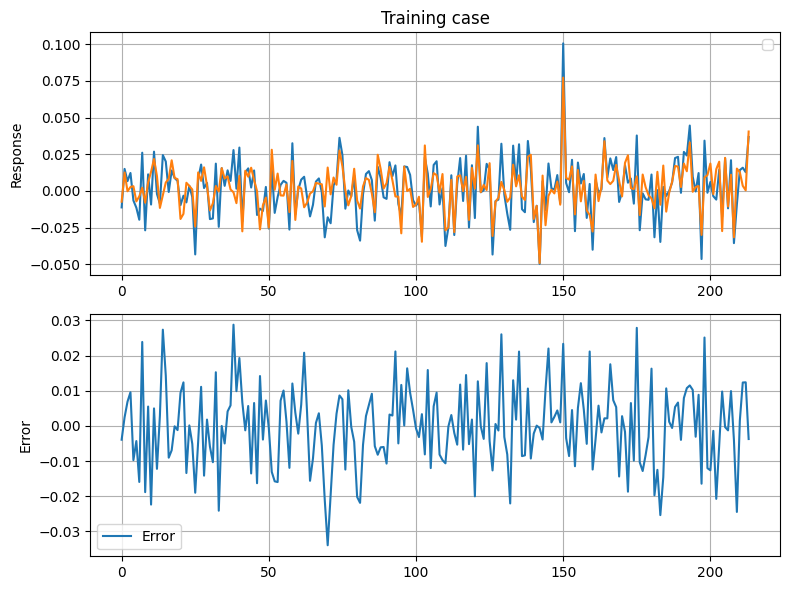

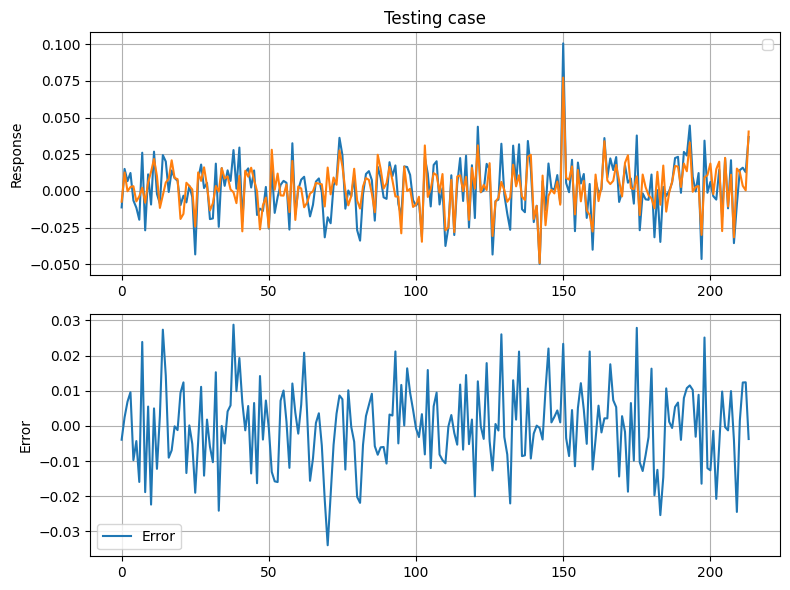

In [514]:
plot_two_responses(y_train, y_train_pred2, 'DL_training.png', 'Training case')
plot_two_responses(y_train, y_train_pred2, 'DL_testing.png', 'Testing case')

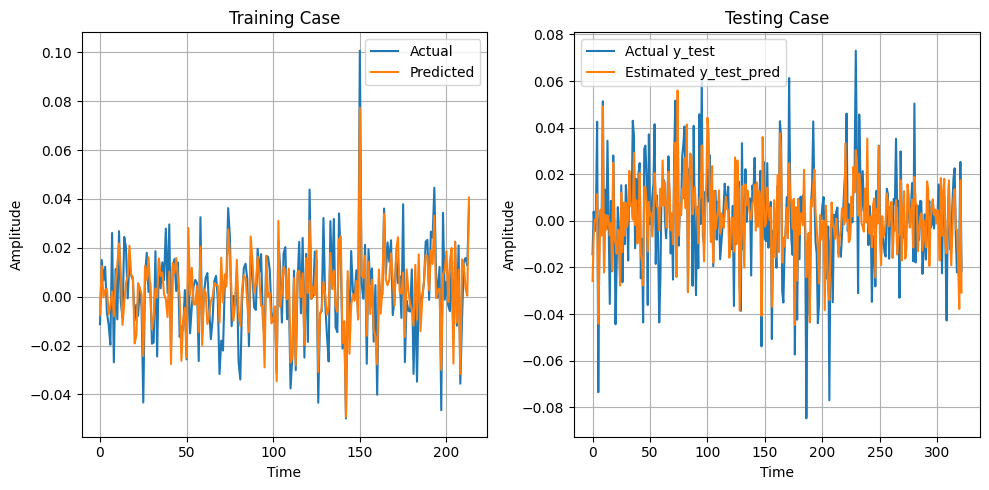

In [515]:
plot_actual_vs_estimated_responses_side_by_side(y_train, y_train_pred2, y_test, y_test_pred2, 'Actual_Estimated_SS_DL.png')

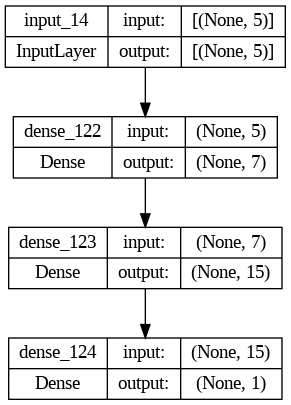

In [516]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_shape = X_train.shape[1]

# Define the model architecture
inputs = Input(shape=(input_shape,))
x = Dense(HL1, activation='relu')(inputs)
x = Dense(HL2, activation='relu')(x)
outputs = Dense(1)(x)
model = Model(inputs=inputs, outputs=outputs)

# Plot the model architecture
plot_model(model, to_file='model.png', show_shapes=True)

In [517]:
# Save the model
model.save('CNN_model_Turkey_2.h5')

In [518]:
# # Load the saved model
# loaded_model = load_model('CNN_model_Turkey.h5')